# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [20]:
# Import libraries
import pandas as pd
import numpy as np

In [21]:
data = pd.read_csv('./datasets/data_all.csv', nrows=10000)
data.head(5)

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# listamos los valores unicos de e
data.e.unique()

array([36.,  0.,  3., 33., 30., 24., 40.,  5.,  8.,  2.,  4., 47.,  7.,
       32., 60., 18., 46., 59., 12., 37., 53., 15.,  1.,  9., 38., 43.,
       44., 19., 55.,  6., 58., 41., 20., 29., 28., 31., 42., 39., 25.,
       49., 35., 14., 57., 34., 26., 61., 11., 13., 27., 51., 23., 10.,
       22., 56., 48., 52., 16., 17., 54., 21., 50., 45.])

In [23]:
import matplotlib.pyplot as plt

In [24]:
# función que muestra la imagen contenida en cada renglon codificado
def img_show(min_val, max_val):
    rows = 10
    cols = 10
    fig = plt.figure(figsize=(20,8))
    for i in range(min_val, max_val):
        img = data[data.e==(i-1)].iloc[0,1:].to_numpy().reshape(28,28)
        fig.add_subplot(rows, cols, i)
        plt.imshow(img)
    plt.show();

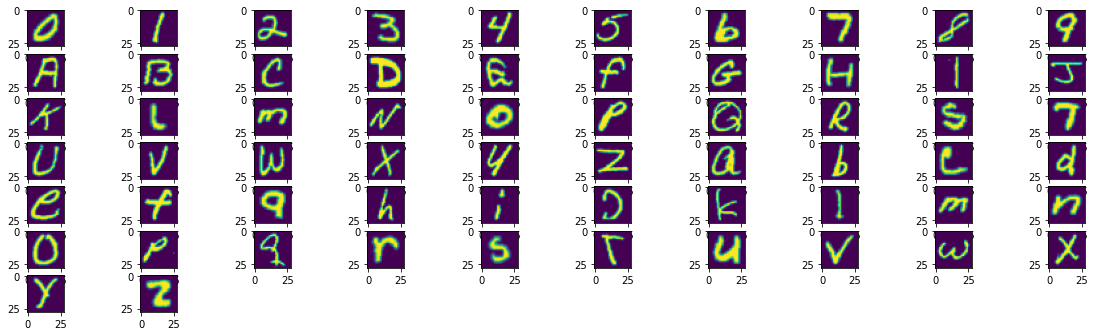

In [25]:
# Primero rvisemos el conetido de cada renglon para identificar los patrones.
img_show(1, 63)

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

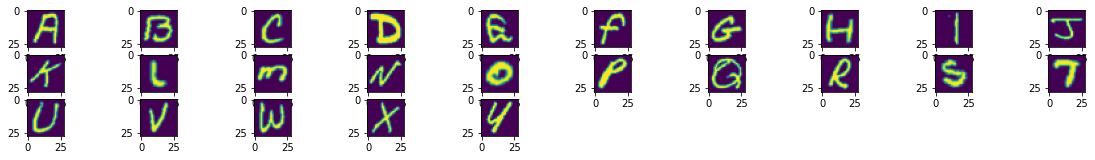

In [26]:
img_show(11, 36)

In [27]:
# Inicializamos X con todas las columnas excepto la e, y "y" con la e
nums = list(range(11,36))
df = data.loc[data.e.isin(nums)]
X = df.drop(columns='e').to_numpy()
y = df.e.to_numpy()


In [28]:
# creamos los sets de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
# inicializamos el modelo random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [30]:
# entremamos el modelo con los sets de entrenamiento
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
# predecimos los valores de prueba
y_pred = rfc.predict(X_test)

In [32]:
# validamos la precisión del resultado
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

array([0.85714286, 0.82857143, 1.        , 0.81818182, 0.875     ,
       1.        , 1.        , 0.78947368, 0.71428571, 0.66666667,
       1.        , 0.88888889, 0.66666667, 0.78313253, 0.65217391,
       1.        , 0.66666667, 0.80555556, 0.75862069, 0.825     ,
       0.76923077, 0.85714286, 0.75      , 0.70588235, 1.        ])

* Try to do the same thing with lowercases.

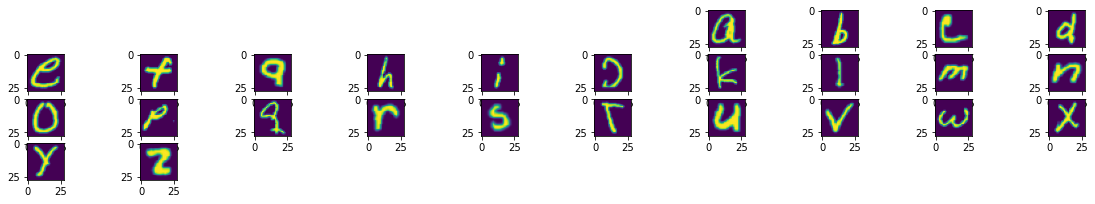

In [33]:
img_show(37, 63)

In [34]:
# Inicializamos X con todas las columnas excepto la e, y "y" con la e
nums = list(range(37,63))
df = data.loc[data.e.isin(nums)]
X = df.drop(columns='e').to_numpy()
y = df.e.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
# incializamos, entrenamos , predecimos y validamos el modelo
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
precision_score(y_test, y_pred, average=None)

array([1.        , 0.4       , 0.57894737, 0.86666667, 1.        ,
       0.5       , 0.60606061, 1.        , 0.66666667, 0.        ,
       0.68333333, 1.        , 0.79411765, 1.        , 0.75      ,
       0.375     , 0.8125    , 0.8       , 0.75      , 0.6       ,
       0.75      , 0.85714286, 1.        , 0.875     , 1.        ])

* Try to do the same thing with numbers.

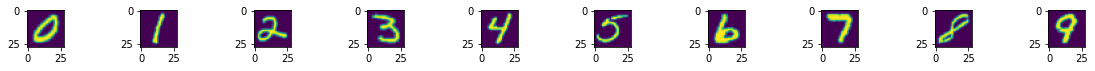

In [36]:
img_show(1, 11)

In [37]:
# Inicializamos X con todas las columnas excepto la e, y "y" con la e t
nums = list(range(1,11))
df = data.loc[data.e.isin(nums)]
X = df.drop(columns='e').to_numpy()
y = df.e.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
# incializamos, entrenamos , predecimos y validamos el modelo
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
precision_score(y_test, y_pred, average=None)

array([0.94615385, 0.96511628, 0.85416667, 0.91304348, 0.875     ,
       0.92857143, 0.97115385, 0.96511628, 0.93269231, 1.        ])